In [1]:
%pylab inline
import csv
import numpy as np
from datetime import date
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


In [9]:
bart_data = []
file = open('bart.csv')
for line in file:
    cols = line.split(',')
    bart_data.append(cols)
bart_data

[['"Participant ID"',
  '"Date"',
  '"Variable Label"',
  '"Max Pumps per Balloon"',
  '"Number of Balloons"',
  '"Number of Explosions"',
  '"Mean pumps"',
  '"Range pumps"',
  '"Standard deviation pumps"',
  '"Mean pumps after explosion"',
  '"Mean pumps after no explosion"',
  '"Mean pumps after no explosion"',
  '"Total gains"\n'],
 ['1231',
  '"2017-02-04T15:16:46.000Z"',
  '"BART0.25"',
  '10',
  '15',
  '4',
  '4.133333333333334',
  '4',
  '1.087300428686673',
  '4.25',
  '4.090909090909091',
  '4.090909090909091',
  '\n'],
 ['1231',
  '"2017-02-06T19:45:38.000Z"',
  '"BART0.25"',
  '10',
  '15',
  '8',
  '4.466666666666667',
  '5',
  '1.25786415094088',
  '4.375',
  '4.571428571428571',
  '4.571428571428571',
  '\n'],
 ['1231',
  '"2017-02-10T18:31:18.000Z"',
  '"BART0.25"',
  '10',
  '15',
  '3',
  '4.733333333333333',
  '4',
  '1.062491830033949',
  '4.666666666666667',
  '4.75',
  '4.75',
  '\n'],
 ['1231',
  '"2017-02-12T07:29:05.000Z"',
  '"BART0.25"',
  '10',
  '15',
  '8

In [46]:
mean_pumps_after_explosion = (np.array(bart_data[1:])[:,9]).astype(float)
mean_pumps_after_no_explosion = (np.array(bart_data[1:])[:,10]).astype(float)
num_explosion = (np.array(bart_data[1:])[:,5]).astype(float)
mean_pumps = (np.array(bart_data[1:])[:,6]).astype(float)

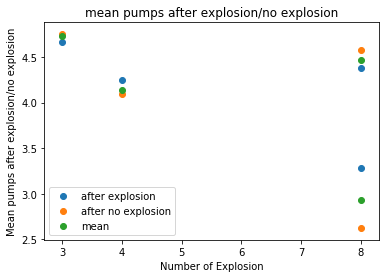

In [49]:
'''
In this scatter plot, the x axis is the number of explosions in a givin trial, 
and y is the mean pumps after explosion or not explosion in a givin trial. 
As we can see, there isn't a big differences between explosion and no explosion except for the last trial,
indicating the number of pumps increase after explosion. But this might be an outlier.
'''
p1 = plt.scatter(num_explosion, mean_pumps_after_explosion)
p2 = plt.scatter(num_explosion, mean_pumps_after_no_explosion)
p3 = plt.scatter(num_explosion, mean_pumps)
plt.xlabel('Number of Explosion')
plt.ylabel('Mean pumps')
plt.legend((p1, p2, p3), ('after explosion', 'after no explosion', 'mean'))
plt.title("mean pumps after explosion/no explosion")
plt.show()

In [139]:
delay_data_money_1 = []
delay_data_money_6 = []
delay_data_time_1 = []
delay_data_time_6 = []
file = open('delay.csv')

for line in file:
    
    data = []
    cols = line.split('[')
    headers = cols[0].split(',')
    data.append(headers)
    for col in cols[1:]:
        col = list(col)
        col = col[:-2]
        col = ''.join(col).split(',')
        data.append(col)
    if 'money_1' in line: delay_data_money_1.append(data)
    if 'money_6' in line: delay_data_money_6.append(data)
    if 'time_1' in line: delay_data_time_1.append(data)
    if 'time_6' in line: delay_data_time_6.append(data)
delay_data_money_1

[[['1231', '"2017-02-04T15:19:19.000Z"', '"dd_money_1_month"', ''],
  ['50', '75', '87.5', '81.25', '78.125', '79.6875'],
  ['100', '100', '100', '100', '100', '100'],
  ['100', '100', '87.5', '81.25', '100', '100'],
  ['4.708510994911194',
   '3.108855009078979',
   '1.361121952533722',
   '3.921608030796051',
   '3.026135981082916',
   '1.326026976108551']],
 [['1231', '"2017-02-06T19:48:28.000Z"', '"dd_money_1_month"', ''],
  ['50', '75', '87.5', '93.75', '96.875', '98.4375'],
  ['100', '100', '100', '100', '100', '100'],
  ['100', '100', '100', '100', '100', '100'],
  ['1.394837975502014',
   '0.590224027633667',
   '2.791767001152039',
   '0.3417379856109619',
   '1.959262013435364',
   '0.2564209699630737']],
 [['1231', '"2017-02-10T18:33:40.000Z"', '"dd_money_1_month"', ''],
  ['50', '75', '87.5', '93.75', '96.875', '98.4375'],
  ['100', '100', '100', '100', '100', '100'],
  ['100', '100', '100', '100', '100', '100'],
  ['1.745643019676208',
   '2.073706030845642',
   '2.0772069

In [140]:
def convertMatrixToFloat(data, k):
    data = np.array(data)[:,k]
    for i in range(len(data)):
        data[i] = np.array(data[i]).astype(float)
    return data



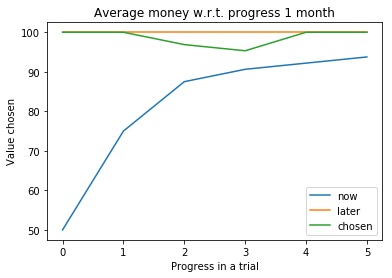

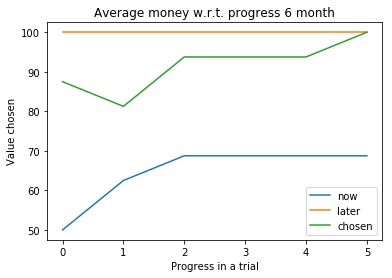

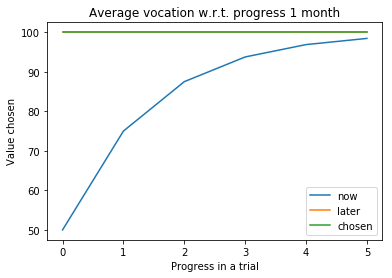

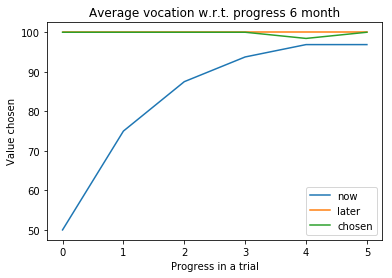

In [142]:
def plotAverages(delay_data, title):
    now = np.mean(convertMatrixToFloat(delay_data, 1))
    later = np.mean(convertMatrixToFloat(delay_data, 2))
    chosen = np.mean(convertMatrixToFloat(delay_data, 3))
    p1 = plt.plot(now, label='now')
    p2 = plt.plot(later, label='later')
    p3 = plt.plot(chosen, label='chosen')
    plt.xlabel('Progress in a trial')
    plt.ylabel('Value chosen')
    plt.legend(loc='lower right')
    plt.title(title)
    plt.show()
    
plotAverages(delay_data_money_1, "Average money w.r.t. progress 1 month")
plotAverages(delay_data_money_6, "Average money w.r.t. progress 6 month")
plotAverages(delay_data_time_1, "Average vocation w.r.t. progress 1 month")
plotAverages(delay_data_time_6, "Average vocation w.r.t. progress 6 month")

In [144]:
goNoGo_data = []
file = open('goNoGo.csv')
for line in file:
    cols = line.split(',')
    goNoGo_data.append(cols)
goNoGo_data

[['Participant ID',
  'Date',
  'Number of Trials',
  'Number of Correct Responses',
  'Number of Correct Nonresponses',
  'Number of Incorrect Responses',
  'Number of Incorrect Nonresponses',
  'Mean Accuracy',
  'Mean Response Time',
  'Minumum Response Time',
  'Maximum Response Time',
  'Mean Response Time (Correct)',
  'Mean Response Time (Incorrect)\n'],
 ['1231',
  '2017-02-06T19:42:53.000Z',
  '75',
  '40',
  '28',
  '7',
  '0',
  '0.906666667',
  '393.4134207',
  '226.1530161',
  '640.1519775',
  '406.2611446',
  '319.9978556\n'],
 ['1231',
  '2017-02-10T18:26:02.000Z',
  '75',
  '42',
  '27',
  '6',
  '0',
  '0.92',
  '351.0171274',
  '174.8359799',
  '503.1090379',
  '359.2008835',
  '293.7308351\n'],
 ['1231',
  '2017-02-12T07:23:48.000Z',
  '75',
  '39',
  '25',
  '10',
  '1',
  '0.853333333',
  '388.2580181',
  '219.1979885',
  '617.1479821',
  '409.6544614',
  '304.8118889']]

In [158]:
mean_accuracies = (np.array(goNoGo_data[1:])[:,7]).astype(float)
mean_responses = (np.array(goNoGo_data[1:])[:,8]).astype(float)
mean_responses_correct = (np.array(goNoGo_data[1:])[:,11]).astype(float)
mean_responses_incorrect = (np.array(goNoGo_data[1:])[:,12]).astype(float)

In [154]:
mean_accuracies

array([ 0.90666667,  0.92      ,  0.85333333])

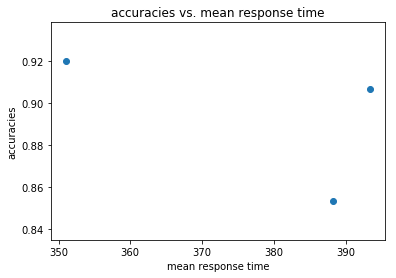

In [169]:
plt.scatter( mean_responses, mean_accuracies)
# p2 = plt.plot(later, label='response time')

plt.xlabel('mean response time')
plt.ylabel('accuracies')
#plt.legend(loc='lower right')
plt.title("accuracies vs. mean response time")
plt.show()


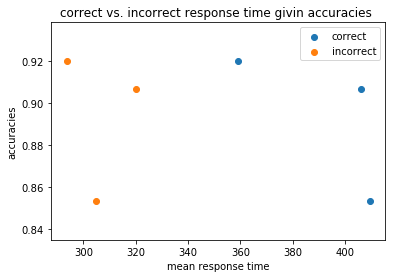

In [168]:
p1 = plt.scatter(mean_responses_correct, mean_accuracies, label='correct')
p2 = plt.scatter(mean_responses_incorrect, mean_accuracies, label='incorrect')

plt.xlabel('mean response time')
plt.ylabel('accuracies')
plt.legend(loc='upper right')
plt.title("correct vs. incorrect response time givin accuracies ")
plt.show()
